In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
import random
import math

##**產生圓形** 

In [ ]:
data=[]
data_train=[]
data_test=[]


#產生100000個點
n=100000
big_R=10 #大圓半徑
pi=math.pi

ratio=0.1
#訓練資料及測試資料數量
train=int(n*(1-ratio))
test=int(n*ratio)
print(train,test)

#產生圓形中的點
for i in range(n):
  point=[]
  r=random.uniform(0,big_R)
  theta=random.uniform(0,2*pi)
  x=r*math.cos(theta)
  point.append(x)
  y=r*math.sin(theta)
  point.append(y)
  data.append(point)

#分割成訓練及測試資料
data_train=data[0:train]
data_test=data[train:n]
#確認data_train的數列
print(data_train[0:5])

90000 10000
[[2.510391802134234, 5.605879584868459], [4.3348689888442244, -0.6922092485279702], [1.3287196944967905, -0.5192851028668775], [-0.6665136011237353, -8.814126472387555], [1.970752673005633, 5.023460100766396]]


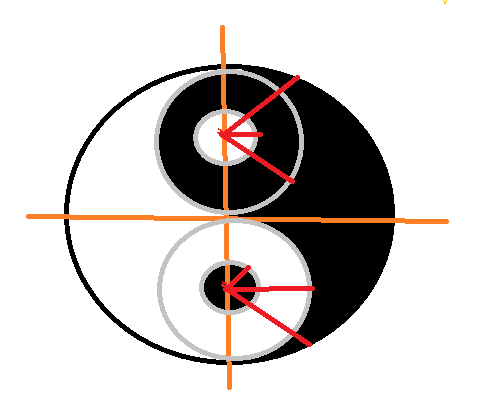

### **標記白點黑點並畫出圖(訓練資料 train data)** 

In [ ]:
medium_R=5 #中圓半徑
small_R=1.5 #小圓半徑
small_white_x=0 #上面小白圓點的x座標
small_white_y=5 #上面小白圓點的y座標
small_black_x=0 #下面小黑圓點的x座標
small_black_y=-5 #下面小白圓點的y座標

for i in range(train):
    #取得x、y座標值
    x=data_train[i][0]
    y=data_train[i][1]

    #以計算某點到小圓點的距離來決定該點的顏色為黑或白(如上圖)
    #第一 二象限
    if y>=0:
      length=math.sqrt((x-small_white_x)**2+(y-small_white_y)**2)
      if x>=0: #第一象限
        if length<=small_R: #距離<小圓半徑
          data_train[i].append("w") #白色
        else:
          data_train[i].append("b") #其餘黑色
      elif x<0: #第二象限
        if length<=small_R: #距離<小圓半徑
          data_train[i].append("w") #白色
        elif length<medium_R: #距離<中圓半徑
          data_train[i].append("b") #黑色
        else:
          data_train[i].append("w") #其餘白色
    #第三 四象限
    elif y<0:
      length=math.sqrt((x-small_black_x)**2+(y-small_black_y)**2)
      if x<=0: #第三象限(規則同上)
        if length<=small_R:
          data_train[i].append("b")
        else:
          data_train[i].append("w")
      elif x>0: #第四象限(規則同上)
        if length<=small_R:
          data_train[i].append("b")
        elif length<medium_R:
          data_train[i].append("w")
        else:            
          data_train[i].append("b")
print(data_train[0:5])

[[2.510391802134234, 5.605879584868459, 'b'], [4.3348689888442244, -0.6922092485279702, 'b'], [1.3287196944967905, -0.5192851028668775, 'w'], [-0.6665136011237353, -8.814126472387555, 'w'], [1.970752673005633, 5.023460100766396, 'b']]


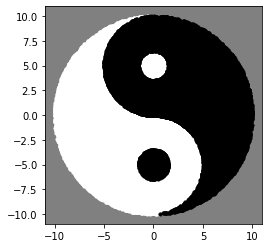

In [ ]:
#放白色點
xpoint_white=[]
ypoint_white=[]
#放黑色點
xpoint_black=[]
ypoint_black=[]

for i in range(train):
  if data_train[i][2]=='w': 
    xpoint_white.append(data_train[i][0])
    ypoint_white.append(data_train[i][1])
  elif data_train[i][2]=='b':
    xpoint_black.append(data_train[i][0])
    ypoint_black.append(data_train[i][1])

fig = plt.figure()
ax = fig.add_subplot(111)

#根據白點黑點產生array
xdata_white=np.array(xpoint_white)
ydata_white=np.array(ypoint_white)
xdata_black=np.array(xpoint_black)
ydata_black=np.array(ypoint_black)

plt.scatter(xdata_white, ydata_white, s=10, c="white" )
plt.scatter(xdata_black, ydata_black, s=10, c="black" )
ax.set_aspect('equal', adjustable='box') #等軸的正方形圖
ax.set_facecolor("gray")
plt.show()

### **標記白點黑點並畫出圖(測試資料 test data)** 

In [ ]:
#規則同上訓練資料
for i in range(test):
    x=data_test[i][0]
    y=data_test[i][1]
    #第一 二象限
    if y>=0:
      length=math.sqrt((x-small_white_x)**2+(y-small_white_y)**2)
      if x>=0:
        if length<=small_R:
          data_test[i].append("w")
        else:
          data_test[i].append("b")
      elif x<0:
        if length<=small_R:
          data_test[i].append("w")
        elif length<medium_R:
          data_test[i].append("b")
        else:
          data_test[i].append("w")
    #第三 四象限
    elif y<0:
      length=math.sqrt((x-small_black_x)**2+(y-small_black_y)**2)
      if x<=0:
        if length<=small_R:
          data_test[i].append("b")
        else:
          data_test[i].append("w")
      elif x>0:
        if length<=small_R:
          data_test[i].append("b")
        elif length<medium_R:
          data_test[i].append("w")
        else:            
          data_test[i].append("b")
print(data_test[0:5])

[[-3.1685912948612094, 0.5154808130692391, 'w'], [-2.411312110328834, -1.1302411830401267, 'w'], [-2.0453040120525094, -2.444575037703437, 'w'], [-0.4042662407405391, -0.49886965630522195, 'w'], [0.2723472939531469, 0.8917253580277689, 'b']]


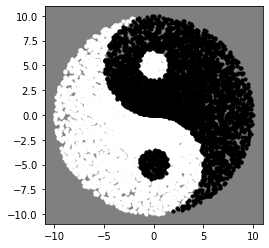

In [ ]:
xpoint_white=[]
ypoint_white=[]
xpoint_black=[]
ypoint_black=[]
for i in range(test):
  if data_test[i][2]=='w':
    xpoint_white.append(data_test[i][0])
    ypoint_white.append(data_test[i][1])
  elif data_test[i][2]=='b':
    xpoint_black.append(data_test[i][0])
    ypoint_black.append(data_test[i][1])

fig = plt.figure()
ax = fig.add_subplot(111)

xdata_white=np.array(xpoint_white)
ydata_white=np.array(ypoint_white)
xdata_black=np.array(xpoint_black)
ydata_black=np.array(ypoint_black)

plt.scatter(xdata_white, ydata_white, s=10, c="white" )
plt.scatter(xdata_black, ydata_black, s=10, c="black" )
ax.set_aspect('equal', adjustable='box')
ax.set_facecolor("gray")
plt.show()

### **神經網路**

In [ ]:
newdata=[]
newdata.extend(data_train[0:])
newdata.extend(data_test[0:])
print(newdata[0])


for i in range(n):
  if newdata[i][2]=="w":
    newdata[i][2]=0 #若為白點 標記為0
  elif newdata[i][2]=="b":
    newdata[i][2]=1 #若為黑點 標記為1

#newdata=np.array(newdata,dtype='float32')
newdata=np.array(newdata)
print(newdata[0:5])
#切割出X和Y
X = newdata[0:,0:2] #代表數列中的前兩項意即座標
Y = newdata[0:,2] #代表該座標對應的顏色

from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
model=Sequential()
# 輸入層
model.add(Dense(2, input_dim=2, activation='tanh'))
# 隱藏層
model.add(Dense(2,  activation='tanh'))
# 輸出層
model.add(Dense(1, activation='tanh'))
model.summary()


model.compile(loss='mse',
              optimizer=RMSprop(),
              metrics=['acc'])
train_history = model.fit(X, Y,
                    validation_split=0.1,
                    batch_size=512,
                    epochs=100)
# 模型評估
score = model.evaluate(X, Y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])  

[2.510391802134234, 5.605879584868459, 'b']
[[ 2.5103918   5.60587958  1.        ]
 [ 4.33486899 -0.69220925  1.        ]
 [ 1.32871969 -0.5192851   0.        ]
 [-0.6665136  -8.81412647  0.        ]
 [ 1.97075267  5.0234601   1.        ]]
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 2)                 6         
                                                                 
 dense_55 (Dense)            (None, 2)                 6         
                                                                 
 dense_56 (Dense)            (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.2125

### **繪製訓練過程圖**

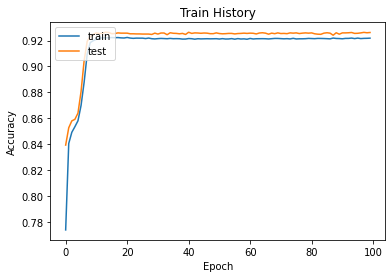

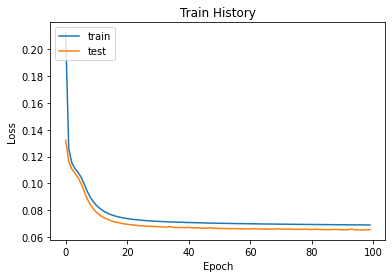

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_type,test_type):
    plt.plot(train_history.history[train_type])
    plt.plot(train_history.history[test_type])
    plt.title('Train History')
    if train_type == 'acc':
        plt.ylabel('Accuracy')
    else:
        plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history('acc','val_acc')
show_train_history('loss','val_loss')